In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### First Dataset

In [3]:
#load and view data
df = pd.read_excel("/content/clean_data.xlsx")#, encoding = "latin")
df.head()

,Unnamed: 0,sex,diploma,state,last_name,middle_name,first_name
0,0,f,NaN,NaN,abache,patience,jezanyi
1,1,f,NaN,NaN,abbas,aisha,yahaya
2,2,f,NaN,NaN,abdulateef,NaN,bilkisu
3,3,m,NaN,NaN,abdullahi,dauda,atiku
4,4,m,NaN,NaN,abdullahi,NaN,salim


In [4]:
#drop columns
df = df.drop(df.columns[[0,2,3,]], axis=1)
df

,sex,last_name,middle_name,first_name
0,f,abache,patience,jezanyi
1,f,abbas,aisha,yahaya
2,f,abdulateef,NaN,bilkisu
3,m,abdullahi,dauda,atiku
4,m,abdullahi,NaN,salim
...,...,...,...,...
1909,m,umar,jibrin,abubakar
1910,m,waziri,NaN,shedrack
1911,m,yunusa,NaN,salaudeen
1912,m,yusuf,lukman,gambo


In [5]:
#Rearranging columns
cols = list(df.columns)
cols = cols[1:] + cols[:1]
df = df[cols]
df

,last_name,middle_name,first_name,sex
0,abache,patience,jezanyi,f
1,abbas,aisha,yahaya,f
2,abdulateef,NaN,bilkisu,f
3,abdullahi,dauda,atiku,m
4,abdullahi,NaN,salim,m
...,...,...,...,...
1909,umar,jibrin,abubakar,m
1910,waziri,NaN,shedrack,m
1911,yunusa,NaN,salaudeen,m
1912,yusuf,lukman,gambo,m


In [6]:
#merging names columns to just one
#male
l_name = df["last_name"]
male_data = df[df["sex"]=="m"]
df_male = pd.concat([male_data["middle_name"], l_name, male_data["first_name"]], ignore_index=True, sort=False)
df_male


,0
0,dauda
1,NaN
2,NaN
3,habib
4,musa
...,...
4425,abubakar
4426,shedrack
4427,salaudeen
4428,gambo


In [7]:
#creating a data frame for male names
MX = pd.DataFrame(columns = ["Name", "Sex"])
MX["Name"] = df_male
MX["Sex"] = "M"
MX.head()

,Name,Sex
0,dauda,M
1,NaN,M
2,NaN,M
3,habib,M
4,musa,M


In [8]:
#female
female_data = df[df["sex"]=="f"]
df_female = pd.concat([female_data["middle_name"], female_data["first_name"]], ignore_index=True, sort=False)
df_female

,0
0,patience
1,aisha
2,NaN
3,khadijat
4,blessing
...,...
1305,christine
1306,ashezi
1307,ojodomo
1308,ene


In [9]:
#creating a data frame for male names
FY = pd.DataFrame(columns = ["Name", "Sex"])
FY["Name"] = df_female
FY["Sex"] = "F"
FY

,Name,Sex
0,patience,F
1,aisha,F
2,NaN,F
3,khadijat,F
4,blessing,F
...,...,...
1305,christine,F
1306,ashezi,F
1307,ojodomo,F
1308,ene,F


In [10]:
#merging dataset
merge= [MX, FY]
gender_data  = pd.concat(merge)
gender_data.reset_index(inplace = True)
df = gender_data.drop(columns=["index"])

In [11]:
#new_datafram
df.head()

,Name,Sex
0,dauda,M
1,NaN,M
2,NaN,M
3,habib,M
4,musa,M


In [12]:
#check columns
df.columns

Index(['Name', 'Sex'], dtype='object')

In [13]:
#check column dtype
df.dtypes

,0
Name,object
Sex,object


### Second Dataset

In [14]:
df1 = pd.read_excel("/content/mmc2 (1).xlsx")
df1.head()

,Igbo Names,Total,Gender,Vowels,Consonants
0,Abananobi,9,U,5,4
1,Abazu,5,M,3,2
2,Adachukwu,9,F,4,5
3,Adadioramma,11,F,6,5
4,Adaego,6,F,4,2


In [15]:
#droping unwanted columns
df1 = df1.drop(columns = ["Total","Vowels","Consonants"])
df1.columns = ['Name', 'Sex']
df1.head(3)

,Name,Sex
0,Abananobi,U
1,Abazu,M
2,Adachukwu,F


In [16]:
#merging two dataset
merge2 = [df,df1]
df3 = pd.concat(merge2, axis=0)
df3

,Name,Sex
0,dauda,M
1,NaN,M
2,NaN,M
3,habib,M
4,musa,M
...,...,...
960,Zikoranibuchi,U
961,Zikoranibuchukwu,U
962,Zimako,U
963,Zimifenna,U


In [17]:
#checking null in colums
df3.isnull().sum()

,0
Name,752
Sex,0


In [18]:
#droping nan values in columns
df3.dropna(inplace = True)

In [19]:
#checking null in colums
df3.isnull().sum()

,0
Name,0
Sex,0


In [20]:
#change values to lower case
df3["Name"] = df3["Name"].apply(str.lower)
df3["Sex"] = df3["Sex"].apply(str.upper)

In [21]:
#droping duplicate
df3.drop_duplicates(inplace = True)

In [22]:
#checking unique values in sex columns
df3["Sex"].value_counts()

,count
Sex,
M,1765
F,785
U,511


In [23]:
#replacing U - Unisex with F - Female
df3["Sex"]= df3["Sex"].replace({"U":"F"})
df3["Sex"].value_counts()

,count
Sex,
M,1765
F,1296


Text(0.5, 1.0, 'No of male and female in the dataset')

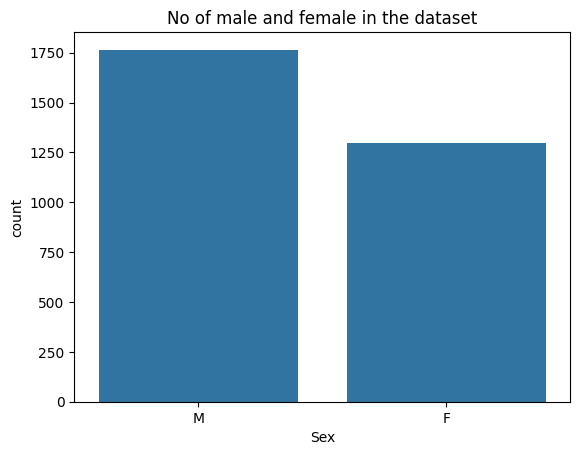

In [24]:
#count plot to visualize sex values
sns.countplot(x=df3["Sex"], data = df3)
plt.title("No of male and female in the dataset")

In [25]:
#distinct count of names that start with alphabet
alpha = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
start_letter_count = {}

for i in alpha:
    start_letter_count[i] = len(df3[df3['Name'].str.startswith(i)])
start_letter_count

{'a': 503,
 'b': 77,
 'c': 274,
 'd': 84,
 'e': 181,
 'f': 44,
 'g': 62,
 'h': 62,
 'i': 181,
 'j': 77,
 'k': 85,
 'l': 47,
 'm': 161,
 'n': 191,
 'o': 470,
 'p': 35,
 'q': 0,
 'r': 58,
 's': 169,
 't': 69,
 'u': 130,
 'v': 14,
 'w': 20,
 'x': 0,
 'y': 31,
 'z': 34}

Text(0.5, 1.0, 'Number of names starting with each letter')

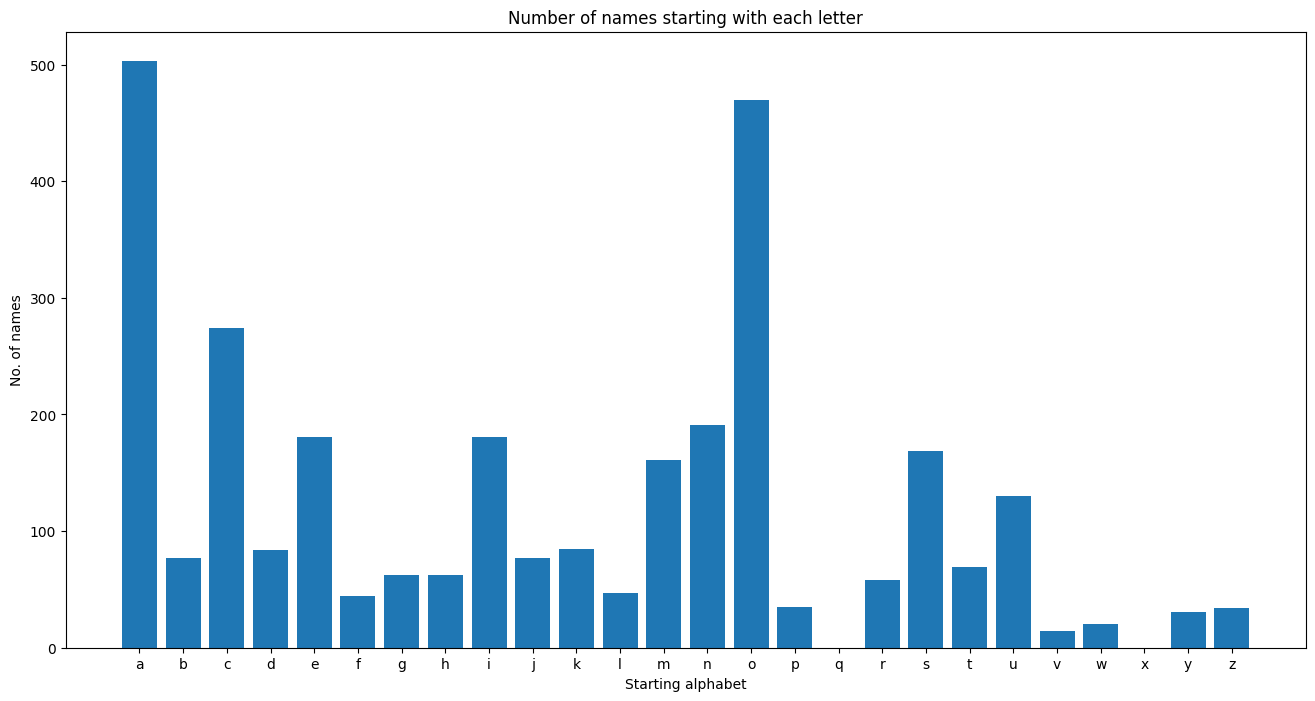

In [26]:
#visuals for distinct count of names that start with alphabet
plt.figure(figsize = (16,8))
plt.bar(start_letter_count.keys(),start_letter_count.values())
plt.xlabel('Starting alphabet')
plt.ylabel('No. of names')
plt.title('Number of names starting with each letter')

In [27]:
# Print the 5 most common starting letters
print('The 5 most common starting letters are:', *sorted(start_letter_count.items(), key=lambda item: item[1])[-5:][::-1])


The 5 most common starting letters are: ('a', 503) ('o', 470) ('c', 274) ('n', 191) ('i', 181)


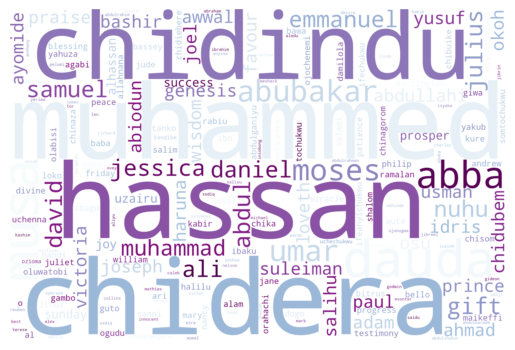

In [28]:
# building a word cloud
from wordcloud import WordCloud, STOPWORDS
text = " ".join(i for i in df3.Name)

word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="white",
    colormap="BuPu",
    collocations=False,
    stopwords=STOPWORDS,).generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [29]:
#check if last alphabet ended with a column
vowels = ('a','e','i','o','u')

df3 = df3.assign(isVowel = lambda x: x.Name.str.endswith(vowels).astype('int'))
df3.head()

,Name,Sex,isVowel
0,dauda,M,1
3,habib,M,0
4,musa,M,1
5,muhammed,M,0
6,abdulrahman,M,0


In [30]:
#count the length of the string in the name columnn
df3["NameLen"] = df3["Name"].str.len()
df3.head()

,Name,Sex,isVowel,NameLen
0,dauda,M,1,5
3,habib,M,0,5
4,musa,M,1,4
5,muhammed,M,0,8
6,abdulrahman,M,0,11


<Axes: xlabel='Sex,isVowel'>

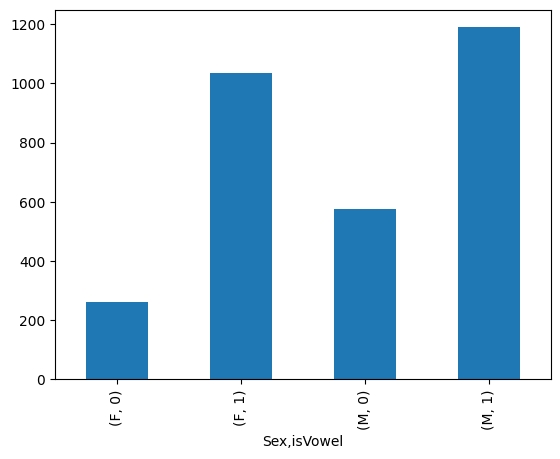

In [31]:
#bar chat
df3.groupby(['Sex','isVowel'])['Name'].count().plot(kind = 'bar')

In [32]:
#df3.groupby(['Sex','NameLen'])['Name'].count().plot(kind = 'bar',figsize=(15,5))

In [33]:
#average sex count
df3.groupby(['Sex'])['NameLen'].mean()

,NameLen
Sex,
F,7.660494
M,6.459490


In [34]:
#removing white space
df3.Name = df3.Name.str.strip()

In [35]:
# To remove digits
df3['Name'] = df3['Name'].str.replace('\d+', '')

In [36]:
# To remove Hindi character names
df3['Name'] = df3["Name"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [37]:
df3.head()

,Name,Sex,isVowel,NameLen
0,dauda,M,1,5
3,habib,M,0,5
4,musa,M,1,4
5,muhammed,M,0,8
6,abdulrahman,M,0,11


In [39]:
df3.shape

(3061, 4)

### Model Building -
LOGISTIC REGRESSION -
SVC -
DEEP LEARNING

In [40]:
#encoding out dependent variable - Sex
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df3['Sex'] = encoder.fit_transform(df3['Sex'])

In [41]:
encoder.classes_

array(['F', 'M'], dtype=object)

In [42]:
df3.head()

,Name,Sex,isVowel,NameLen
0,dauda,1,1,5
3,habib,1,0,5
4,musa,1,1,4
5,muhammed,1,0,8
6,abdulrahman,1,0,11


In [43]:
#value count in sex
df3['Sex'].value_counts()

,count
Sex,
1,1765
0,1296


In [44]:
#Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
n = 3
vectorizer = CountVectorizer(analyzer=lambda x: (x[-i-1:] for i in range(0, min(n, len(x)))))
vectorizer.fit(df3["Name"])

CountVectorizer(analyzer=<function <lambda> at 0x79600ea87400>)

In [45]:
matrix = vectorizer.transform(df3["Name"]).todense()
matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [46]:
tri_grams = pd.DataFrame(matrix, columns=vectorizer.get_feature_names_out())
tri_grams

,d,u,"""i",'il,'la,'u,'ud,",",-i,.,...,zo,zoh,zom,zor,zra,zu,zua,zue,zy,zzy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#merging trigrqam dataset with our dataset
df4 = df3.join(tri_grams)

In [48]:
#checkin for null in our data set
df4.isnull().sum()

,0
Name,0
Sex,0
isVowel,0
NameLen,0
d,1115
...,...
zu,1115
zua,1115
zue,1115
zy,1115


In [49]:
#fill nan with zero
df4.fillna(0, inplace = True)

In [50]:
df4.head()

,Name,Sex,isVowel,NameLen,d,u,"""i",'il,'la,'u,...,zo,zoh,zom,zor,zra,zu,zua,zue,zy,zzy
0,dauda,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,habib,1,0,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,musa,1,1,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,muhammed,1,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,abdulrahman,1,0,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df4.shape

(3061, 1172)

In [52]:
#featur selection
X1 = df4.drop(['Name','Sex'],axis=1)
Y1 = df4['Sex']

In [53]:
print(X1.shape)
print(Y1.shape)

(3061, 1170)
(3061,)


In [54]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

# Feature extraction: Use a simple character count vectorizer
vectorizer = CountVectorizer(analyzer='char')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.6354733405875952
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60       383
           1       0.72      0.62      0.66       536

    accuracy                           0.64       919
   macro avg       0.64      0.64      0.63       919
weighted avg       0.65      0.64      0.64       919



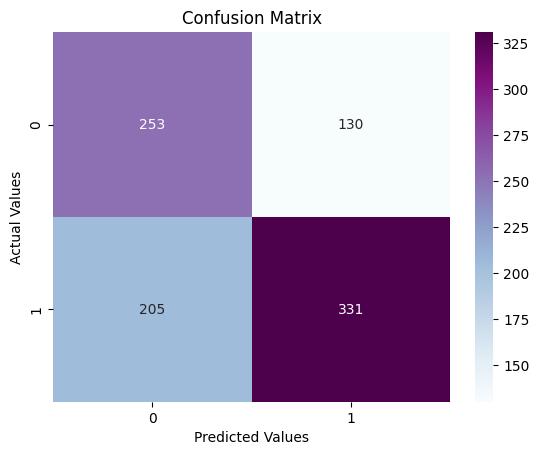

In [57]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# function for confusion matrix
def cmatrix(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    cmatrix = confusion_matrix(Y_test, y_pred)
    sns.heatmap(cmatrix, fmt='d', cmap='BuPu', annot=True)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have defined y_test
print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Classification Report:")
print(classification_report(Y_test, y_pred))
cmatrix(model, X_test, Y_test)


In [ ]:
df3.shape

(3061, 4)

### DEEP LEARNING

In [ ]:
df3.head()

,Name,Sex,isVowel,NameLen
0,dauda,1,1,5
3,habib,1,0,5
4,musa,1,1,4
5,muhammed,1,0,8
6,abdulrahman,1,0,11


In [ ]:
df3.isnull().sum()

,0
Name,0
Sex,0
isVowel,0
NameLen,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#encoding out dependent variable - Sex
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df3['Sex'] = encoder.fit_transform(df3['Sex'])
labels = df3['Sex']

# Tokenize names
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df3['Name'])
total_chars = len(tokenizer.word_index) + 1

# Convert names to sequences
sequences = tokenizer.texts_to_sequences(df3['Name'])
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build a simple LSTM model
model = Sequential()
model.add(Embedding(total_chars, 32, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Predict gender for new names
new_names = ['Alex', 'Eva', 'Charlie']
new_sequences = pad_sequences(tokenizer.texts_to_sequences(new_names), maxlen=max_sequence_length, padding='post')
predictions = model.predict(new_sequences)

for name, prediction in zip(new_names, predictions):
    gender = 'Female' if prediction > 0.5 else 'Male'
    print(f"Name: {name}, Predicted Gender: {gender}, Confidence: {prediction[0]:.2f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2448/2448 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.5656 - loss: 0.6738 - val_accuracy: 0.6786 - val_loss: 0.6279
Epoch 2/10
2448/2448 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6715 - loss: 0.6272 - val_accuracy: 0.6574 - val_loss: 0.6230
Epoch 3/10
2448/2448 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6721 - loss: 0.6247 - val_accuracy: 0.6395 - val_loss: 0.6382
Epoch 4/10
2448/2448 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6454 - loss: 0.6268 - val_accuracy: 0.6721 - val_loss: 0.6209
Epoch 5/10
2448/2448 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6689 - loss: 0.6119 - val_accuracy: 0.6607 - val_loss: 0.6060
Epoch 6/10
2448/2448 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6937 - loss: 0.5965 - val_accuracy: 0.6427 - val_loss: 0.6384
Epoch 7/10
2448/2448 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.6813 - loss: 0.6059 - val_accuracy: 0.6868 - val_loss: 0.5989
Epoch 8/10
2448/2448 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6940 - loss: 0.5912 - v

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate Accuracy, Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred, target_names=['Male', 'Female'], output_dict=True)

# Extract metrics
accuracy = report['accuracy']
precision_male = report['Male']['precision']
recall_male = report['Male']['recall']
f1_male = report['Male']['f1-score']
precision_female = report['Female']['precision']
recall_female = report['Female']['recall']
f1_female = report['Female']['f1-score']

# Print the metrics
print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print(f"Male - Precision: {precision_male:.2f}, Recall: {recall_male:.2f}, F1-Score: {f1_male:.2f}")
print(f"Female - Precision: {precision_female:.2f}, Recall: {recall_female:.2f}, F1-Score: {f1_female:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Overall Accuracy: 69.17%
Male - Precision: 0.61, Recall: 0.65, F1-Score: 0.63
Female - Precision: 0.75, Recall: 0.72, F1-Score: 0.74


In [ ]:
#Deep Learning - Tensorflow

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.69
Precision: 0.75
Recall: 0.72
F1-Score: 0.74


In [ ]:
import joblib

# Save the trained model
model.save('tf_gender_prediction_model.h5')  # Saves the entire model (architecture + weights)

# Save the tokenizer using joblib or pickle
joblib.dump(tokenizer, 'tf_name_tokenizer.pkl')  # Save the tokenizer
print("Model and tokenizer saved successfully!")


Model and tokenizer saved successfully!


In [ ]:
#test
from tensorflow.keras.models import load_model
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib

# Load the trained model and tokenizer
model = load_model('/content/tf_gender_prediction_model.h5')  # Load the saved model
tokenizer = joblib.load('/content/tf_name_tokenizer.pkl')  # Load the saved tokenizer

print("Model and tokenizer loaded successfully!")

# Load your dataset
# Assuming you have a DataFrame `df` with a column "Name"
df = pd.DataFrame({
    'Name': ['Alex', 'Eva', 'Charlie', 'Diana', 'Bob']  # Example dataset
})

# Predict gender for each name in the dataset
names = df['Name']  # Extract names column
max_sequence_length = model.input_shape[1]  # Get the max sequence length from the model input shape
results = []  # List to store prediction results

for name in names:
    try:
        # Convert the name to a padded sequence
        sequence = pad_sequences(tokenizer.texts_to_sequences([name]),
                                  maxlen=max_sequence_length,
                                  padding='post')
        # Make prediction
        prediction = model.predict(sequence)
        gender = 'Female' if prediction[0] > 0.5 else 'Male'  # Interpret prediction
        results.append({'Name': name, 'Predicted Gender': gender})
    except Exception as e:
        print(f"Error processing name '{name}': {e}")
        results.append({'Name': name, 'Predicted Gender': 'Error'})

# Save results to an Excel file
output_file = 'name_gender_predictions.xlsx'
df_results = pd.DataFrame(results)  # Convert list of results to DataFrame
df_results.to_excel(output_file, index=False)  # Save DataFrame to Excel

print(f"Predictions saved to {output_file}.")


Model and tokenizer loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predictions saved to name_gender_predictions.xlsx.


In [ ]:
#logistic
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.64
Precision: 0.72
Recall: 0.62
F1-Score: 0.66
